# Section 3: Explainability Analysis and Ablation Studies (Simplified)

## Airbnb Dataset - Model Interpretability for Regression

This notebook provides comprehensive explainability analysis and ablation studies for the trained regression models using wrapped functions for better modularity.

**Analysis Components:**
- **Feature Importance**: Built-in and permutation-based importance
- **SHAP Analysis**: Shapley Additive Explanations for model predictions
- **LIME Analysis**: Local Interpretable Model-agnostic Explanations
- **Ablation Studies**: Feature ablation, hyperparameter sensitivity
- **Cross-Model Comparison**: Feature importance consensus across models

**Models Analyzed:**
- XGBoost, Improved FT-Transformer, Original FT-Transformer, SAINT
- Focus on understanding what drives Airbnb price prediction
- Identify most important features for rental price prediction

## 1. Import Required Libraries and Functions

In [1]:
# Import the wrapped functions from our custom module
from section3_explainability_functions import (
    setup_analysis_environment,
    load_section2_results,
    load_preprocessed_data,
    load_and_filter_models,
    initialize_explainability_analyzer,
    analyze_xgboost_explainability,
    analyze_ft_transformer_enhanced_explainability,
    analyze_saint_explainability,
    perform_cross_model_comparison,
    generate_explanation_reports,
    generate_business_insights,
    run_ablation_studies,
    generate_analysis_summary,
    save_final_results,
    run_complete_explainability_analysis
)

# Import additional libraries for display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Memory management utilities
import gc
import pickle
import os

## 2. Setup Analysis Environment

In [4]:
with open('./airbnb_section5_ablation_results.pkl', 'rb') as f:
    data = pickle.load(f)
    print(data)
# Setup the analysis environment
setup_analysis_environment()

{'all_results': {'XGBoost Enhanced': {'baseline': {'r2_score': 0.5938924926676097, 'rmse': 0.3749635765697902, 'mae': 0.2630160493983224, 'mse': 0.1405976837540089, 'explained_variance': 0.5971329679009507, 'train_time': 0, 'inference_time': 0.16013121604919434, 'n_train_samples': 29022, 'n_test_samples': 9777, 'mape': 0.059731476174569774}, 'feature_ablation': {'single_feature_removal': [{'removed_feature': 'room_type', 'removed_feature_idx': 6, 'r2_score': 0.41035735954867236, 'r2_drop': 0.18353513311893732, 'relative_importance': 0.30903763793097555}, {'removed_feature': 'availability_365', 'removed_feature_idx': 12, 'r2_score': 0.5702571734671109, 'r2_drop': 0.023635319200498772, 'relative_importance': 0.039797302529175106}, {'removed_feature': 'calculated_host_listings_count', 'removed_feature_idx': 11, 'r2_score': 0.5897519680112122, 'r2_drop': 0.004140524656397471, 'relative_importance': 0.006971842054778832}, {'removed_feature': 'last_review', 'removed_feature_idx': 9, 'r2_scor

True

## 3. Option 1: Run Complete Analysis Pipeline (Recommended)

This single function call will run the entire explainability analysis pipeline:

2025-08-04 08:08:19,477 - INFO - Initialized RegressionExplainabilityAnalyzer with 43 features
2025-08-04 08:08:19,478 - INFO - Starting explainability analysis for XGBoost Enhanced


🔍 Section 3: Explainability Analysis and Ablation Studies
Dataset: Airbnb Price Prediction
Task: Regression
✅ Section 2 results loaded successfully!
Models available: ['XGBoost Enhanced', 'FT-Transformer Enhanced', 'SAINT Enhanced']
Best overall model: XGBoost Enhanced
Best R² model: XGBoost Enhanced
✅ Enhanced preprocessed data loaded successfully!
Features: 43
Test samples: 9,777
Target transformation: boxcox
Outliers removed: 2263

📋 Enhanced Feature Names:
    1. name
    2. host_name
    3. neighbourhood_group
    4. neighbourhood
    5. latitude
    6. longitude
    7. room_type
    8. minimum_nights
    9. number_of_reviews
   10. last_review
   11. reviews_per_month
   12. calculated_host_listings_count
   13. availability_365
   14. latitude_x_longitude
   15. latitude_div_longitude
   16. latitude_x_minimum_nights
   17. latitude_div_minimum_nights
   18. latitude_x_number_of_reviews
   19. latitude_div_number_of_reviews
   20. longitude_x_minimum_nights
   21. longitude_div_

2025-08-04 08:08:19,590 - INFO - Baseline metrics calculated - R²: 0.5939, RMSE: 0.3750


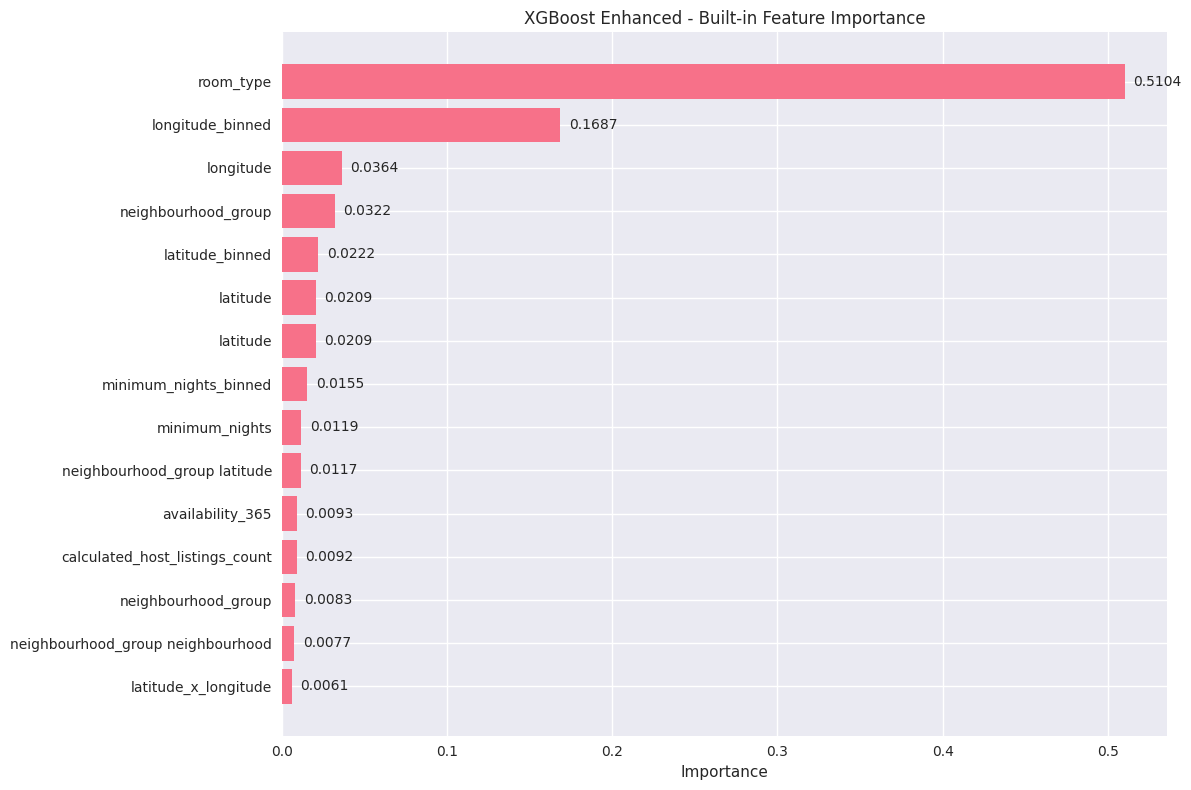

2025-08-04 08:08:20,320 - INFO - Built-in feature importance extracted for XGBoost Enhanced


      📊 Calculating permutation importance...


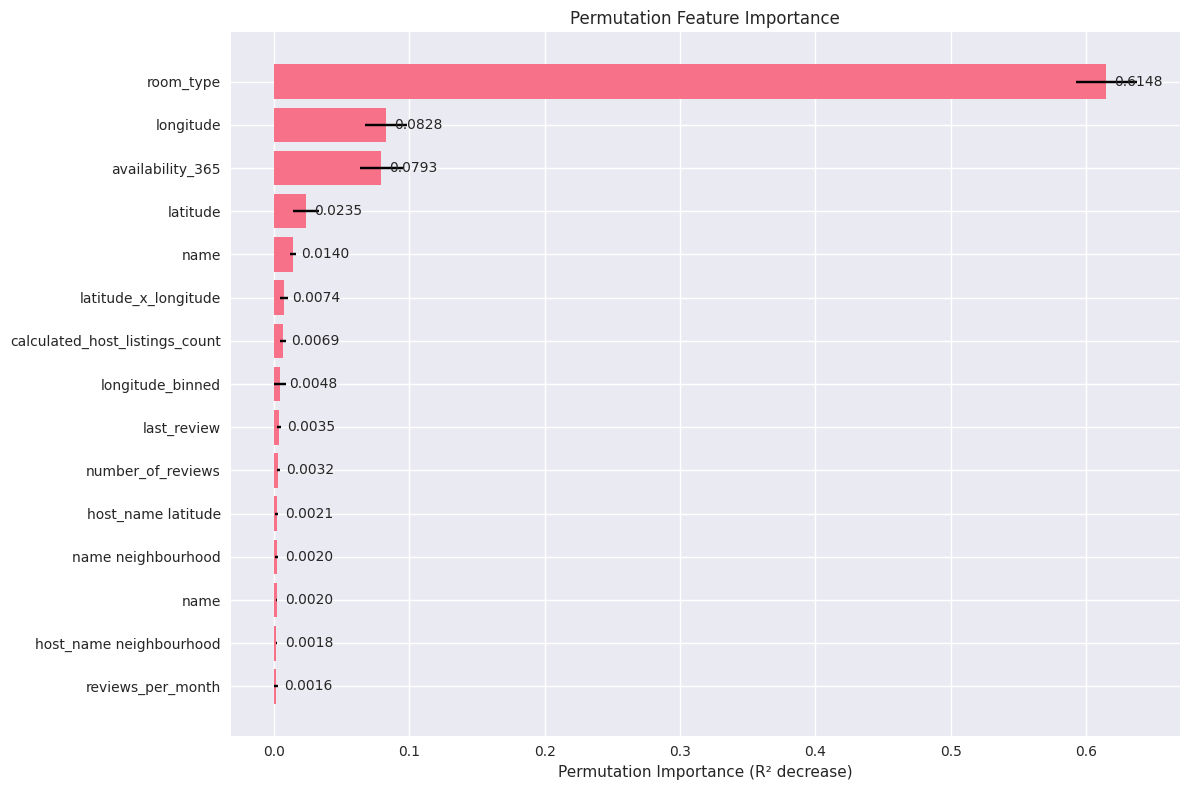

2025-08-04 08:08:22,401 - INFO - Permutation importance calculated using 300 samples


      🎯 Performing SHAP analysis...
         Using GPU for SHAP with 200 samples
         Creating SHAP plots for XGBoost Enhanced...
         ✓ SHAP summary plot saved
         ✓ SHAP importance plot saved


2025-08-04 08:08:25,789 - INFO - SHAP analysis completed for XGBoost Enhanced with 200 samples


      🍋 Performing LIME analysis...


2025-08-04 08:08:29,434 - INFO - LIME analysis completed for 5 instances
2025-08-04 08:08:29,437 - INFO - Completed explainability analysis for XGBoost Enhanced
2025-08-04 08:08:29,588 - INFO - Starting explainability analysis for FT-Transformer Enhanced


💾 Intermediate results saved to './Section3_Explainability/XGBoost Enhanced_explainability_results.pkl'
💾 Intermediate results saved to 'airbnb_xgb_explanations.pkl'
✅ XGBoost Enhanced explainability analysis completed

🎯 Top 10 Most Important Features (XGBoost Enhanced Built-in):
    1. room_type: 0.5104
    2. longitude_binned: 0.1687
    3. longitude: 0.0364
    4. neighbourhood_group: 0.0322
    5. latitude_binned: 0.0222
    6. latitude: 0.0209
    7. latitude: 0.0209
    8. minimum_nights_binned: 0.0155
    9. minimum_nights: 0.0119
   10. neighbourhood_group latitude: 0.0117

GPU memory allocated: 9.66 MB
GPU memory cached: 22.00 MB

FT-TRANSFORMER ENHANCED EXPLAINABILITY ANALYSIS

🔍 Analyzing FT-Transformer Enhanced explainability...


2025-08-04 08:08:29,922 - INFO - Baseline metrics calculated - R²: 0.5009, RMSE: 0.4157


        ✅ Model appears to be already trained, using existing model
      📊 Calculating permutation importance...


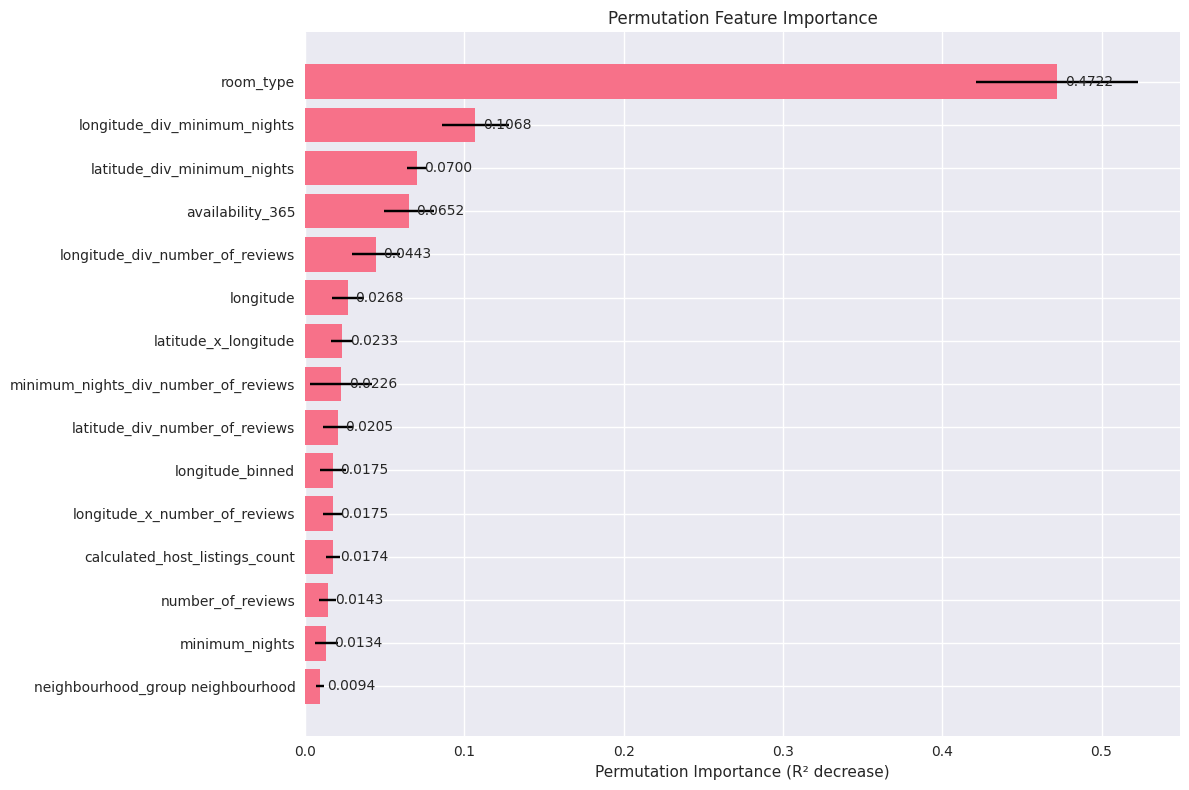

2025-08-04 08:08:31,944 - INFO - Permutation importance calculated using 300 samples


      🎯 Performing SHAP analysis...
         Using CPU for SHAP with 50 samples
         Using CPU-based KernelExplainer for neural network


  0%|          | 0/20 [00:00<?, ?it/s]

2025-08-04 08:08:32,143 - INFO - num_full_subsets = 1
2025-08-04 08:08:32,144 - INFO - remaining_weight_vector = array([0.15876501, 0.10848943, 0.0834534 , 0.06851964, 0.05864293,
       0.05166163, 0.04649547, 0.04254487, 0.0394507 , 0.03698503,
       0.03499659, 0.03338136, 0.03206584, 0.03099698, 0.03013595,
       0.02945414, 0.02893051, 0.02854985, 0.02830159, 0.02817907])
2025-08-04 08:08:32,144 - INFO - num_paired_subset_sizes = 21
2025-08-04 08:08:32,187 - INFO - weight_left = 0.763376385063524
2025-08-04 08:08:33,670 - INFO - np.sum(w_aug) = 43.0
2025-08-04 08:08:33,671 - INFO - np.sum(self.kernelWeights) = 0.9999999999999999
2025-08-04 08:08:33,677 - INFO - phi = array([ 0.        ,  0.        ,  0.        ,  0.        , -0.07600065,
       -0.12242575,  0.28858408,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.0885639 ,  0.16857842,  0.        ,
        0.        ,  0.        , -0.04525159,  0.        ,  0.        ,
        0.        , -0.053278

         Creating SHAP plots for FT-Transformer Enhanced...
         ✓ SHAP summary plot saved
         ✓ SHAP importance plot saved


2025-08-04 08:09:04,967 - INFO - SHAP analysis completed for FT-Transformer Enhanced with 20 samples


      🍋 Performing LIME analysis...


2025-08-04 08:09:08,326 - INFO - LIME analysis completed for 5 instances
2025-08-04 08:09:08,329 - INFO - Completed explainability analysis for FT-Transformer Enhanced
2025-08-04 08:09:08,482 - INFO - Starting explainability analysis for SAINT Enhanced


💾 Intermediate results saved to './Section3_Explainability/FT-Transformer Enhanced_explainability_results.pkl'
💾 Intermediate results saved to 'airbnb_ft_enhanced_explanations.pkl'
✅ FT-Transformer Enhanced explainability analysis completed

🎯 Top 10 Most Important Features (FT-Transformer Enhanced - Permutation):
    1. room_type: 0.4722
    2. longitude_div_minimum_nights: 0.1068
    3. latitude_div_minimum_nights: 0.0700
    4. availability_365: 0.0652
    5. longitude_div_number_of_reviews: 0.0443
    6. longitude: 0.0268
    7. latitude_x_longitude: 0.0233
    8. minimum_nights_div_number_of_reviews: 0.0226
    9. latitude_div_number_of_reviews: 0.0205
   10. longitude_binned: 0.0175

GPU memory allocated: 9.66 MB
GPU memory cached: 22.00 MB

SAINT ENHANCED EXPLAINABILITY ANALYSIS

🔍 Analyzing SAINT Enhanced explainability...


2025-08-04 08:09:08,749 - INFO - Baseline metrics calculated - R²: -50.1619, RMSE: 4.2086


        ✅ Model appears to be already trained, using existing model
      📊 Calculating permutation importance...


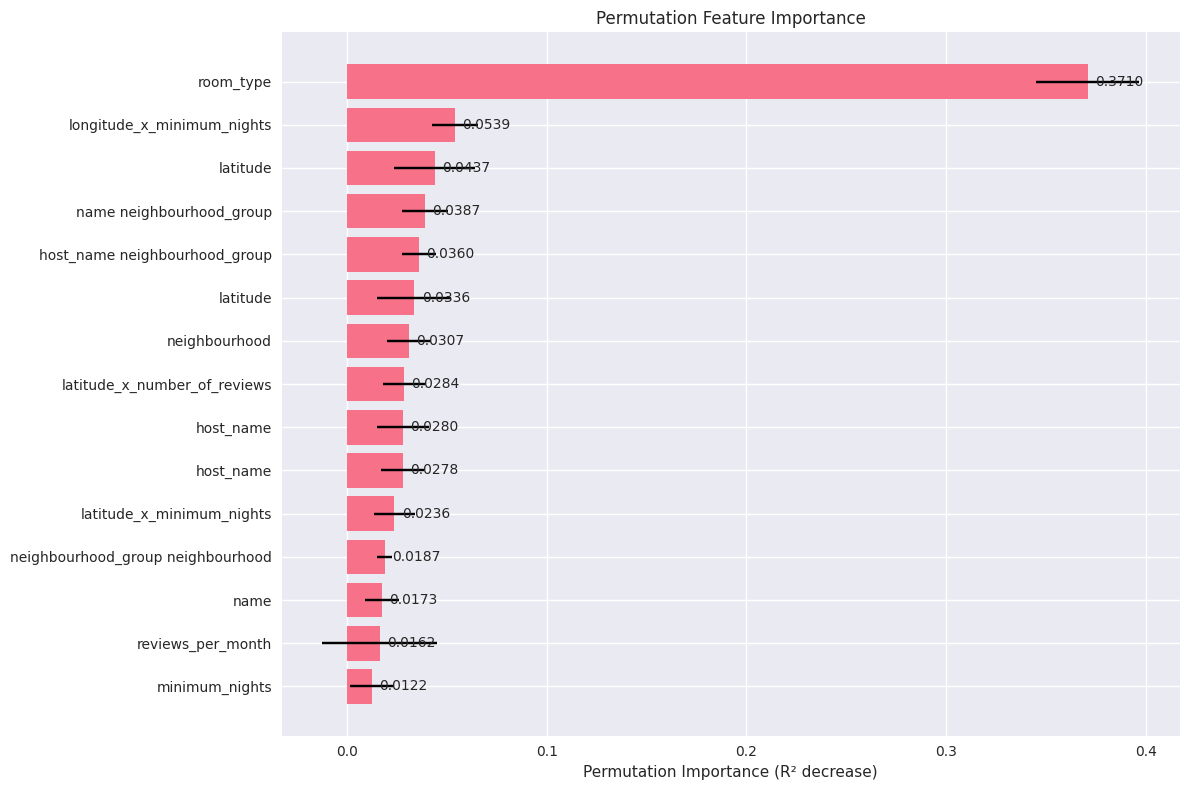

2025-08-04 08:09:10,620 - INFO - Permutation importance calculated using 300 samples


      🎯 Performing SHAP analysis...
         Using CPU for SHAP with 50 samples
         Using CPU-based KernelExplainer for neural network


  0%|          | 0/20 [00:00<?, ?it/s]

2025-08-04 08:09:10,811 - INFO - num_full_subsets = 1
2025-08-04 08:09:10,812 - INFO - remaining_weight_vector = array([0.15876501, 0.10848943, 0.0834534 , 0.06851964, 0.05864293,
       0.05166163, 0.04649547, 0.04254487, 0.0394507 , 0.03698503,
       0.03499659, 0.03338136, 0.03206584, 0.03099698, 0.03013595,
       0.02945414, 0.02893051, 0.02854985, 0.02830159, 0.02817907])
2025-08-04 08:09:10,812 - INFO - num_paired_subset_sizes = 21
2025-08-04 08:09:10,856 - INFO - weight_left = 0.763376385063524
2025-08-04 08:09:12,205 - INFO - np.sum(w_aug) = 43.0
2025-08-04 08:09:12,205 - INFO - np.sum(self.kernelWeights) = 1.0
2025-08-04 08:09:12,212 - INFO - phi = array([0.        , 0.        , 0.        , 0.        , 0.01180655,
       0.03125602, 0.49298699, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.11235689, 0.        , 0.        ,
       0.01653504, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0107437 , 0.        , 0.        , 0.       

         Creating SHAP plots for SAINT Enhanced...
         ✓ SHAP summary plot saved
         ✓ SHAP importance plot saved


2025-08-04 08:09:40,871 - INFO - SHAP analysis completed for SAINT Enhanced with 20 samples


      🍋 Performing LIME analysis...


2025-08-04 08:09:44,222 - INFO - LIME analysis completed for 5 instances
2025-08-04 08:09:44,225 - INFO - Completed explainability analysis for SAINT Enhanced


💾 Intermediate results saved to './Section3_Explainability/SAINT Enhanced_explainability_results.pkl'
💾 Intermediate results saved to 'airbnb_saint_explanations.pkl'
✅ SAINT Enhanced explainability analysis completed

🎯 Top 10 Most Important Features (SAINT Enhanced - Permutation):
    1. room_type: 0.3710
    2. longitude_x_minimum_nights: 0.0539
    3. latitude: 0.0437
    4. name neighbourhood_group: 0.0387
    5. host_name neighbourhood_group: 0.0360
    6. latitude: 0.0336
    7. neighbourhood: 0.0307
    8. latitude_x_number_of_reviews: 0.0284
    9. host_name: 0.0280
   10. host_name: 0.0278

GPU memory allocated: 9.66 MB
GPU memory cached: 22.00 MB

CROSS-MODEL FEATURE IMPORTANCE COMPARISON

GPU memory allocated: 9.66 MB
GPU memory cached: 22.00 MB

🔄 Comparing feature importance across models...


<Figure size 1500x1000 with 0 Axes>

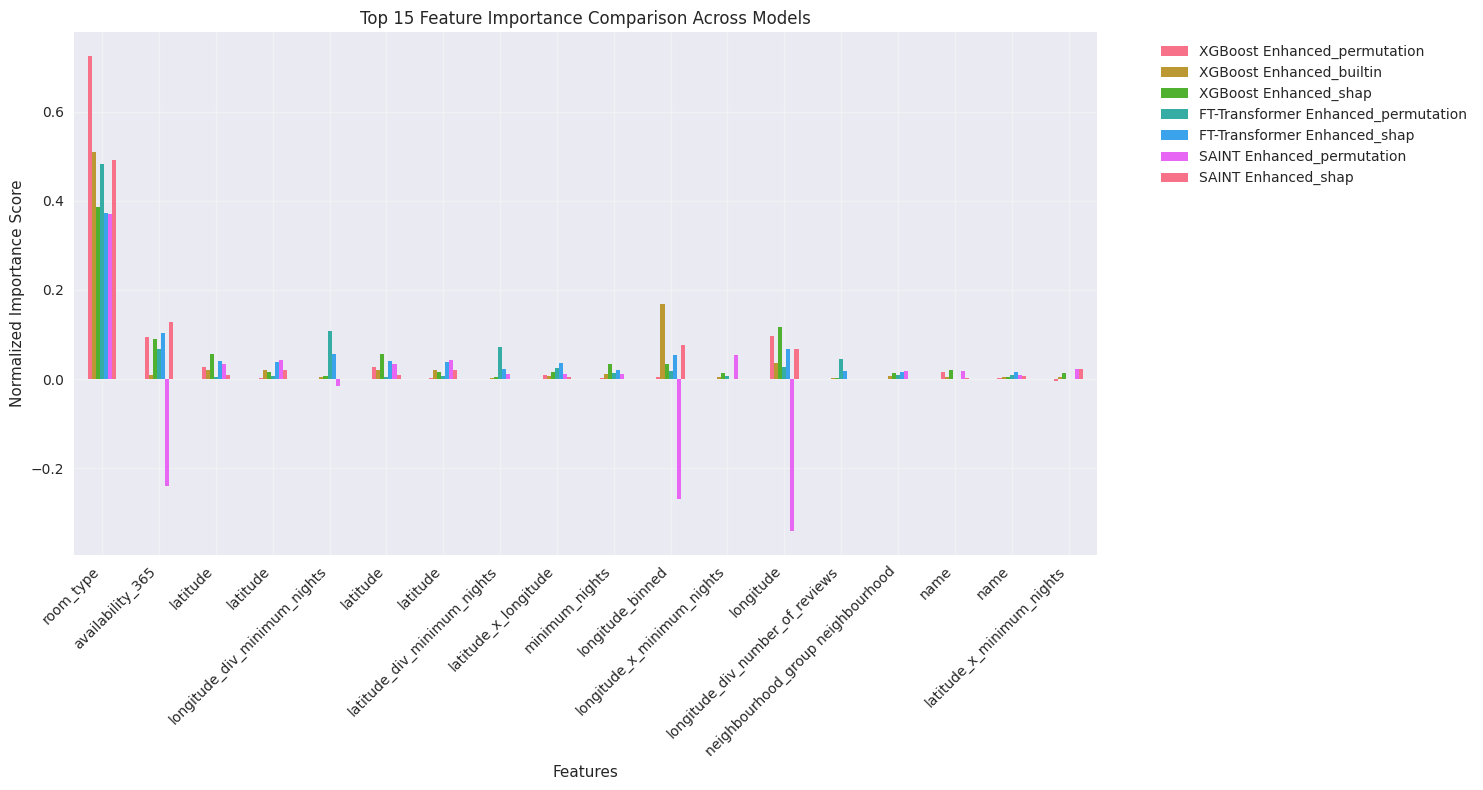

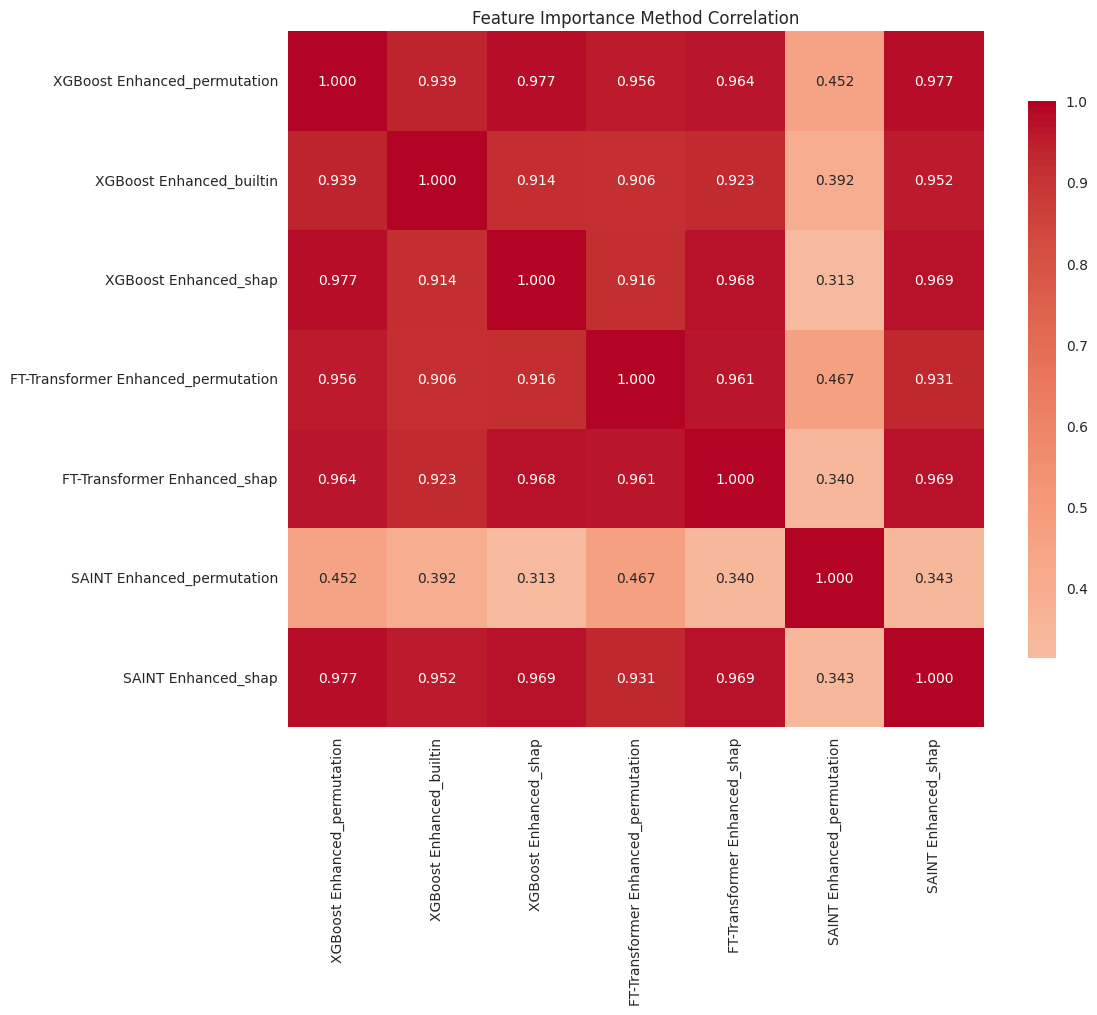

2025-08-04 08:09:46,598 - INFO - Feature importance comparison completed



📊 Feature Importance Comparison Table:
                                      XGBoost Enhanced_permutation  XGBoost Enhanced_builtin  XGBoost Enhanced_shap  FT-Transformer Enhanced_permutation  FT-Transformer Enhanced_shap  SAINT Enhanced_permutation  SAINT Enhanced_shap
name                                                        0.0165                    0.0041                 0.0193                               0.0009                        0.0000                      0.0173               0.0026
host_name                                                   0.0014                    0.0030                 0.0041                              -0.0009                        0.0000                      0.0280               0.0000
neighbourhood_group                                        -0.0014                    0.0322                 0.0030                              -0.0019                        0.0005                     -0.0376               0.0258
neighbourhood                   

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f2940f79dd0>>
Traceback (most recent call last):
  File "/home/ec2-user/tabular/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 



GPU memory allocated: 9.66 MB
GPU memory cached: 22.00 MB
          🔧 Applying target scaling for proper training...
          🚀 Training FT-Transformer with 42 features for 50 epochs...
          🧹 Clearing memory before retraining FT-Transformer Enhanced...

GPU memory allocated: 9.66 MB
GPU memory cached: 22.00 MB
          🔧 Applying target scaling for proper training...
          🚀 Training FT-Transformer with 42 features for 50 epochs...
          🧹 Clearing memory before retraining FT-Transformer Enhanced...

GPU memory allocated: 9.66 MB
GPU memory cached: 22.00 MB
          🔧 Applying target scaling for proper training...
          🚀 Training FT-Transformer with 42 features for 50 epochs...
          🧹 Clearing memory before retraining FT-Transformer Enhanced...

GPU memory allocated: 9.66 MB
GPU memory cached: 22.00 MB
          🔧 Applying target scaling for proper training...
          🚀 Training FT-Transformer with 42 features for 50 epochs...
          🧹 Clearing memory b


KeyboardInterrupt

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f2940f79dd0>>
Traceback (most recent call last):
  File "/home/ec2-user/tabular/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

In [3]:
# Run the complete explainability analysis pipeline
results = run_complete_explainability_analysis(
    section2_results_file='./airbnb_section2_results.pkl',
    preprocessed_data_file='./Section1_Data_PreProcessing/enhanced_data.pkl',
    model_dir='./Section2_Model_Training',
    save_dir='./Section3_Explainability',
    min_r2_threshold=0.5,
    max_samples=300
)

print("\n🎉 Complete explainability analysis finished!")
print(f"📊 Models analyzed: {results['models_analyzed']}")
print(f"📁 Results saved to: {results['results_file']}")

## 4. Option 2: Step-by-Step Analysis (For Detailed Control)

If you prefer to run the analysis step-by-step for more control, use the following cells:

### 4.1 Load Data and Models

In [3]:
# Load Section 2 results
section2_data = load_section2_results('./airbnb_section2_results.pkl')

# Load preprocessed data
preprocessing_data = load_preprocessed_data('./Section1_Data_PreProcessing/enhanced_data.pkl')

# Extract variables
comparison_df = section2_data['comparison_df']
predictions = section2_data['predictions']
feature_names = preprocessing_data['feature_names']
X_train_scaled = preprocessing_data['X_train_scaled']
X_test_scaled = preprocessing_data['X_test_scaled']
y_train = preprocessing_data['y_train']
y_test = preprocessing_data['y_test']

print(f"\n📊 Data loaded successfully!")
print(f"Features: {len(feature_names)}")
print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")
print(predictions.keys())

✅ Section 2 results loaded successfully!
Models available: ['XGBoost Enhanced', 'FT-Transformer Enhanced', 'SAINT Enhanced']
Best overall model: XGBoost Enhanced
Best R² model: XGBoost Enhanced
✅ Enhanced preprocessed data loaded successfully!
Features: 43
Test samples: 9,777
Target transformation: boxcox
Outliers removed: 2263

📋 Enhanced Feature Names:
    1. name
    2. host_name
    3. neighbourhood_group
    4. neighbourhood
    5. latitude
    6. longitude
    7. room_type
    8. minimum_nights
    9. number_of_reviews
   10. last_review
   11. reviews_per_month
   12. calculated_host_listings_count
   13. availability_365
   14. latitude_x_longitude
   15. latitude_div_longitude
   16. latitude_x_minimum_nights
   17. latitude_div_minimum_nights
   18. latitude_x_number_of_reviews
   19. latitude_div_number_of_reviews
   20. longitude_x_minimum_nights
   21. longitude_div_minimum_nights
   22. longitude_x_number_of_reviews
   23. longitude_div_number_of_reviews
   24. minimum_ni

### 4.2 Load and Filter Models

In [4]:
# Load and filter models based on performance
models_to_analyze, device, model_results_detailed = load_and_filter_models(
    model_dir='./Section2_Model_Training',
    feature_names=feature_names,
    predictions=predictions,
    comparison_df=comparison_df,
    min_r2_threshold=0.5
)

print(f"\n🔍 Models selected for analysis: {list(models_to_analyze.keys())}")

🔄 Loading all available models...
📦 Loading Enhanced XGBoost model...
   ✅ Loaded XGBoost Enhanced (Tuned) from ./Section2_Model_Training/xgboost_tuned_enhanced.pkl
✅ XGBoost Enhanced (Tuned) loaded successfully!
📦 Loading Improved FT-Transformer model...
✅ Improved FT-Transformer loaded successfully!
📦 Loading Enhanced SAINT model...
   ✅ Using improved SAINT training module
   ✅ Loaded SAINT model from ./Section2_Model_Training/improved_saint_model.pkl
✅ Enhanced SAINT loaded successfully!
✅ Successfully loaded 3 models: ['XGBoost Enhanced', 'FT-Transformer Enhanced', 'SAINT Enhanced']

📦 Models Loaded for Analysis:
   ✅ XGBoost Enhanced
   ✅ FT-Transformer Enhanced
   ✅ SAINT Enhanced
   📊 XGBoost Enhanced: R² = 0.5939 - Will analyze
   📊 FT-Transformer Enhanced: R² = 0.5009 - Will analyze
   📊 SAINT Enhanced: R² = 0.5510 - Will analyze

🔍 Models selected for analysis: ['XGBoost Enhanced', 'FT-Transformer Enhanced', 'SAINT Enhanced']

🔍 Models selected for analysis: ['XGBoost Enhanc

### 4.3 Initialize Explainability Analyzer

In [5]:
# Initialize the explainability analyzer
explainer = initialize_explainability_analyzer(
    feature_names=feature_names,
    save_dir='./Section3_Explainability'
)

# Store intermediate results
intermediate_results = {}

2025-08-04 09:19:21,493 - INFO - Initialized RegressionExplainabilityAnalyzer with 43 features


🔧 Regression explainability analyzer initialized
Feature names: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude']...
Total features: 43
Save directory: ./Section3_Explainability


### 4.4 Run Model-Specific Explainability Analysis

2025-08-01 09:31:42,395 - INFO - Starting explainability analysis for XGBoost Enhanced
2025-08-01 09:31:42,524 - INFO - Baseline metrics calculated - R²: 0.5939, RMSE: 0.3750



XGBOOST ENHANCED EXPLAINABILITY ANALYSIS

🔍 Analyzing XGBoost Enhanced explainability...
        ✅ Model appears to be already trained, using existing model


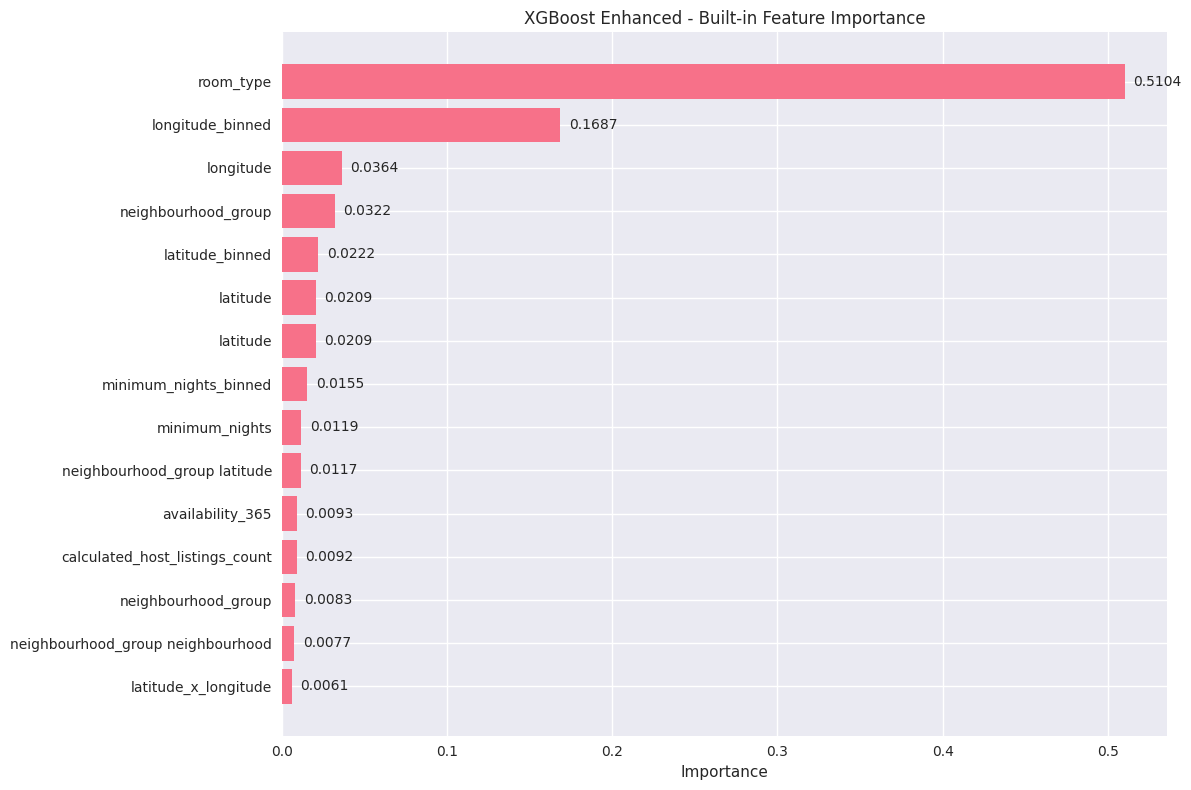

2025-08-01 09:31:43,331 - INFO - Built-in feature importance extracted for XGBoost Enhanced


      📊 Calculating permutation importance...


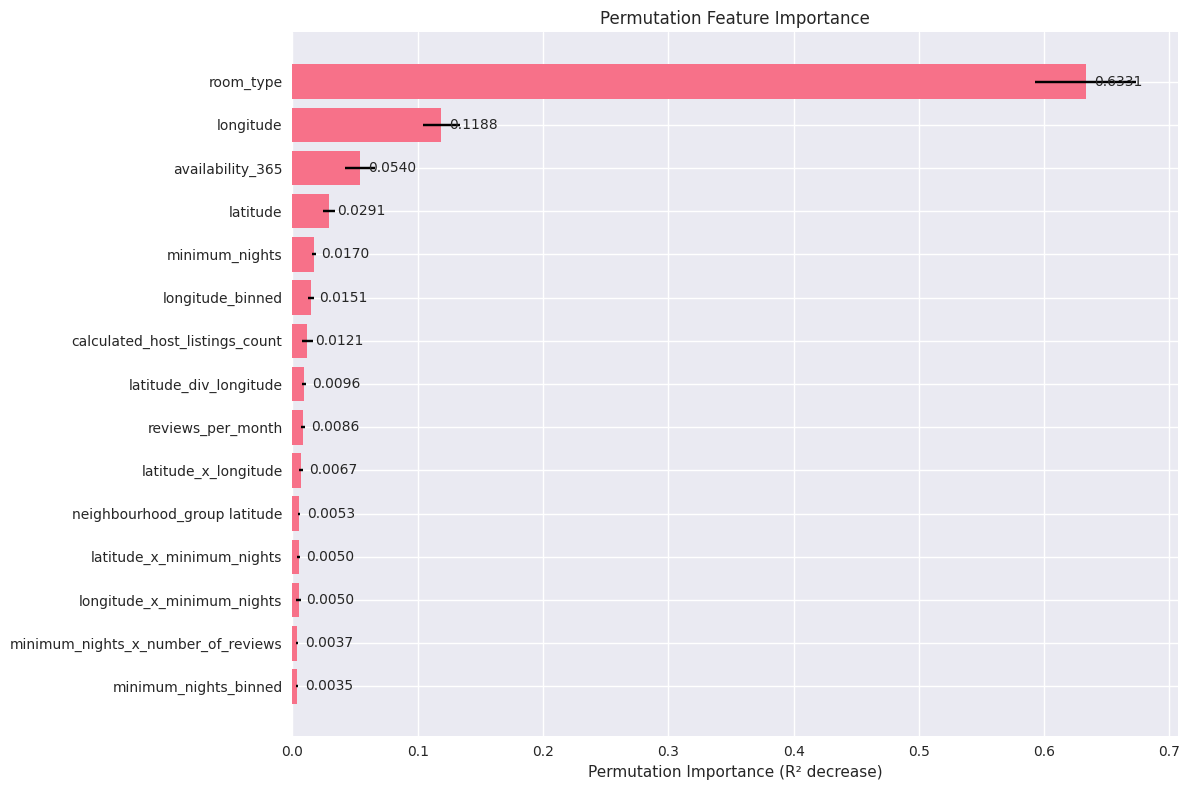

2025-08-01 09:31:45,610 - INFO - Permutation importance calculated using 300 samples


      🎯 Performing SHAP analysis...
         Using GPU for SHAP with 200 samples
         Creating SHAP plots for XGBoost Enhanced...
         ✓ SHAP summary plot saved
         ✓ SHAP importance plot saved


2025-08-01 09:31:49,271 - INFO - SHAP analysis completed for XGBoost Enhanced with 200 samples


      🍋 Performing LIME analysis...


2025-08-01 09:31:53,287 - INFO - LIME analysis completed for 5 instances
2025-08-01 09:31:53,292 - INFO - Completed explainability analysis for XGBoost Enhanced


💾 Intermediate results saved to './Section3_Explainability/XGBoost Enhanced_explainability_results.pkl'
💾 Intermediate results saved to 'airbnb_xgb_explanations.pkl'
✅ XGBoost Enhanced explainability analysis completed

🎯 Top 10 Most Important Features (XGBoost Enhanced Built-in):
    1. room_type: 0.5104
    2. longitude_binned: 0.1687
    3. longitude: 0.0364
    4. neighbourhood_group: 0.0322
    5. latitude_binned: 0.0222
    6. latitude: 0.0209
    7. latitude: 0.0209
    8. minimum_nights_binned: 0.0155
    9. minimum_nights: 0.0119
   10. neighbourhood_group latitude: 0.0117

GPU memory allocated: 9.66 MB
GPU memory cached: 24.00 MB


In [14]:
# Analyze XGBoost explainability
xgb_results = analyze_xgboost_explainability(
    models_to_analyze, explainer, X_train_scaled, X_test_scaled, 
    y_train, y_test, feature_names, max_samples=300
)
if xgb_results:
    intermediate_results['xgb_explanations'] = xgb_results

2025-08-04 09:19:29,296 - INFO - Starting explainability analysis for FT-Transformer Enhanced



FT-TRANSFORMER ENHANCED EXPLAINABILITY ANALYSIS

🔍 Analyzing FT-Transformer Enhanced explainability...
        ✅ Model appears to be already trained, using existing model


2025-08-04 09:19:29,542 - INFO - Baseline metrics calculated - R²: 0.5009, RMSE: 0.4157


      📊 Calculating permutation importance...


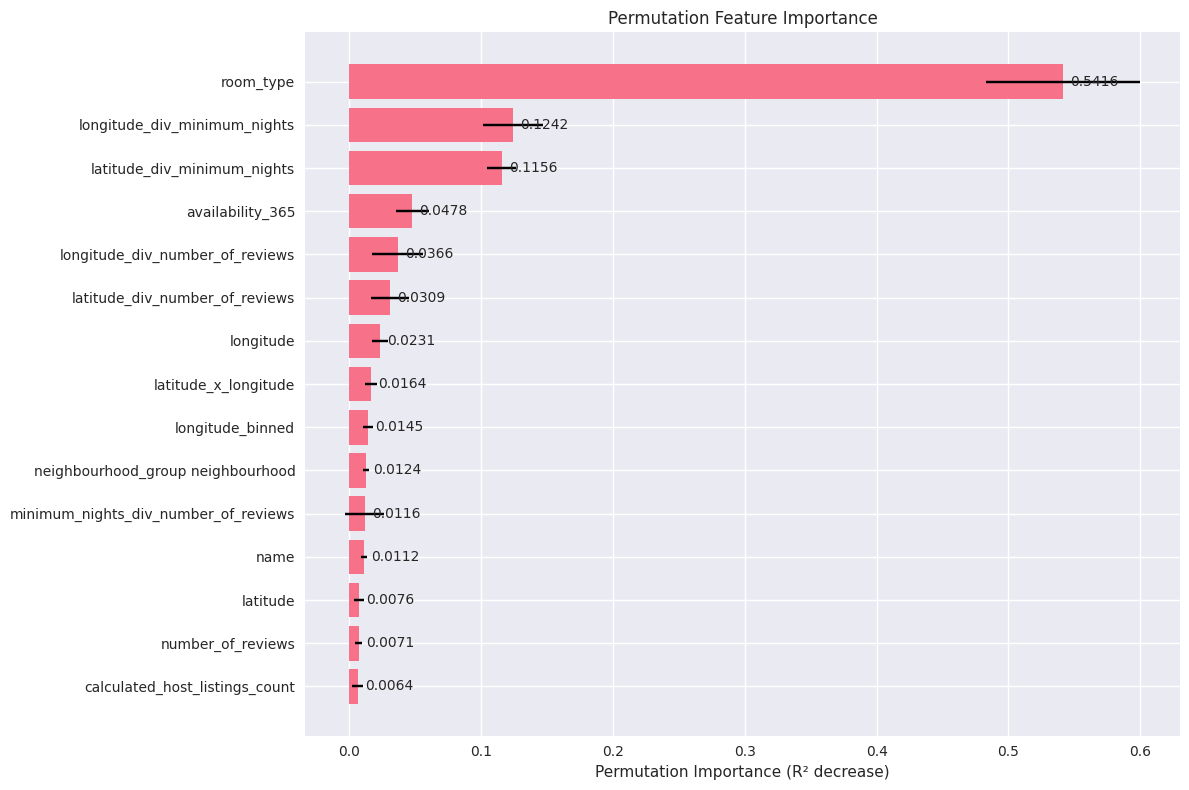

2025-08-04 09:19:31,580 - INFO - Permutation importance calculated using 300 samples


      🎯 Performing SHAP analysis...
         Using CPU for SHAP with 50 samples
         Using CPU-based KernelExplainer for neural network


  0%|          | 0/20 [00:00<?, ?it/s]

2025-08-04 09:19:31,739 - INFO - num_full_subsets = 1
2025-08-04 09:19:31,740 - INFO - remaining_weight_vector = array([0.15876501, 0.10848943, 0.0834534 , 0.06851964, 0.05864293,
       0.05166163, 0.04649547, 0.04254487, 0.0394507 , 0.03698503,
       0.03499659, 0.03338136, 0.03206584, 0.03099698, 0.03013595,
       0.02945414, 0.02893051, 0.02854985, 0.02830159, 0.02817907])
2025-08-04 09:19:31,740 - INFO - num_paired_subset_sizes = 21
2025-08-04 09:19:31,781 - INFO - weight_left = 0.763376385063524
2025-08-04 09:19:33,269 - INFO - np.sum(w_aug) = 43.0
2025-08-04 09:19:33,270 - INFO - np.sum(self.kernelWeights) = 1.0
2025-08-04 09:19:33,277 - INFO - phi = array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.30059054,  0.02376233,  0.03632379,  0.        ,
        0.02055949,  0.        , -0.08988253,  0.02578261,  0.02276331,
        0.        ,  0.03789715,  0.        ,  0.01559541,  0.        ,
        0.        ,  0.        ,  0.        

         Creating SHAP plots for FT-Transformer Enhanced...
         ✓ SHAP summary plot saved


2025-08-04 09:20:04,495 - INFO - SHAP analysis completed for FT-Transformer Enhanced with 20 samples


         ✓ SHAP importance plot saved
      🍋 Performing LIME analysis...


2025-08-04 09:20:08,153 - INFO - LIME analysis completed for 5 instances
2025-08-04 09:20:08,157 - INFO - Completed explainability analysis for FT-Transformer Enhanced


💾 Intermediate results saved to './Section3_Explainability/FT-Transformer Enhanced_explainability_results.pkl'
💾 Intermediate results saved to 'airbnb_ft_enhanced_explanations.pkl'
✅ FT-Transformer Enhanced explainability analysis completed

🎯 Top 10 Most Important Features (FT-Transformer Enhanced - Permutation):
    1. room_type: 0.5416
    2. longitude_div_minimum_nights: 0.1242
    3. latitude_div_minimum_nights: 0.1156
    4. availability_365: 0.0478
    5. longitude_div_number_of_reviews: 0.0366
    6. latitude_div_number_of_reviews: 0.0309
    7. longitude: 0.0231
    8. latitude_x_longitude: 0.0164
    9. longitude_binned: 0.0145
   10. neighbourhood_group neighbourhood: 0.0124

GPU memory allocated: 9.66 MB
GPU memory cached: 22.00 MB


In [6]:
# Analyze Improved FT-Transformer explainability
ft_results = analyze_ft_transformer_enhanced_explainability(
    models_to_analyze, explainer, X_train_scaled, X_test_scaled, 
    y_train, y_test, feature_names, model_results_detailed, device, max_samples=300
)
if ft_results:
    intermediate_results['improved_ft_explanations'] = ft_results

2025-08-01 09:32:33,882 - INFO - Starting explainability analysis for SAINT Enhanced
2025-08-01 09:32:34,012 - INFO - Baseline metrics calculated - R²: -50.1619, RMSE: 4.2086



SAINT ENHANCED EXPLAINABILITY ANALYSIS

🔍 Analyzing SAINT Enhanced explainability...
        ✅ Model appears to be already trained, using existing model
      📊 Calculating permutation importance...


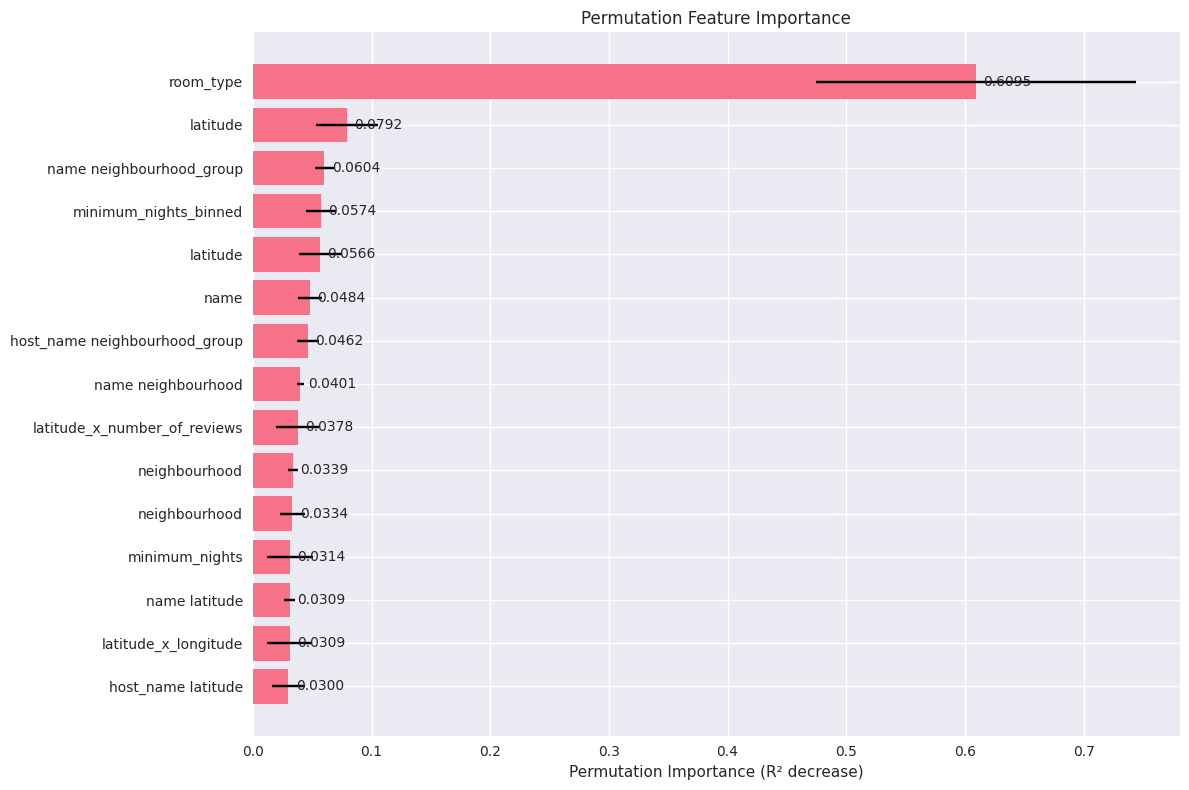

2025-08-01 09:32:36,022 - INFO - Permutation importance calculated using 300 samples


      🎯 Performing SHAP analysis...
         Using CPU for SHAP with 50 samples
         Using CPU-based KernelExplainer for neural network


  0%|          | 0/20 [00:00<?, ?it/s]

2025-08-01 09:32:36,312 - INFO - num_full_subsets = 1
2025-08-01 09:32:36,313 - INFO - remaining_weight_vector = array([0.15876501, 0.10848943, 0.0834534 , 0.06851964, 0.05864293,
       0.05166163, 0.04649547, 0.04254487, 0.0394507 , 0.03698503,
       0.03499659, 0.03338136, 0.03206584, 0.03099698, 0.03013595,
       0.02945414, 0.02893051, 0.02854985, 0.02830159, 0.02817907])
2025-08-01 09:32:36,314 - INFO - num_paired_subset_sizes = 21
2025-08-01 09:32:36,362 - INFO - weight_left = 0.763376385063524
2025-08-01 09:32:37,706 - INFO - np.sum(w_aug) = 43.0
2025-08-01 09:32:37,706 - INFO - np.sum(self.kernelWeights) = 1.0
2025-08-01 09:32:37,712 - INFO - phi = array([ 0.        ,  0.        , -0.0311015 ,  0.        ,  0.        ,
       -0.13349996, -0.39635345,  0.        ,  0.        ,  0.        ,
        0.        , -0.02828801,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.00983843,  0.        

         Creating SHAP plots for SAINT Enhanced...
         ✓ SHAP summary plot saved
         ✓ SHAP importance plot saved


2025-08-01 09:33:06,609 - INFO - SHAP analysis completed for SAINT Enhanced with 20 samples


      🍋 Performing LIME analysis...


2025-08-01 09:33:10,227 - INFO - LIME analysis completed for 5 instances
2025-08-01 09:33:10,231 - INFO - Completed explainability analysis for SAINT Enhanced


💾 Intermediate results saved to './Section3_Explainability/SAINT Enhanced_explainability_results.pkl'
💾 Intermediate results saved to 'airbnb_saint_explanations.pkl'
✅ SAINT Enhanced explainability analysis completed

🎯 Top 10 Most Important Features (SAINT Enhanced - Permutation):
    1. room_type: 0.6095
    2. latitude: 0.0792
    3. name neighbourhood_group: 0.0604
    4. minimum_nights_binned: 0.0574
    5. latitude: 0.0566
    6. name: 0.0484
    7. host_name neighbourhood_group: 0.0462
    8. name neighbourhood: 0.0401
    9. latitude_x_number_of_reviews: 0.0378
   10. neighbourhood: 0.0339

GPU memory allocated: 9.66 MB
GPU memory cached: 24.00 MB


In [16]:
# Analyze SAINT explainability
saint_results = analyze_saint_explainability(
    models_to_analyze, explainer, X_train_scaled, X_test_scaled, 
    y_train, y_test, feature_names, device, max_samples=300
)
if saint_results:
    intermediate_results['saint_explanations'] = saint_results

### 4.5 Cross-Model Feature Importance Comparison


CROSS-MODEL FEATURE IMPORTANCE COMPARISON

GPU memory allocated: 9.66 MB
GPU memory cached: 24.00 MB

🔄 Comparing feature importance across models...


<Figure size 1500x1000 with 0 Axes>

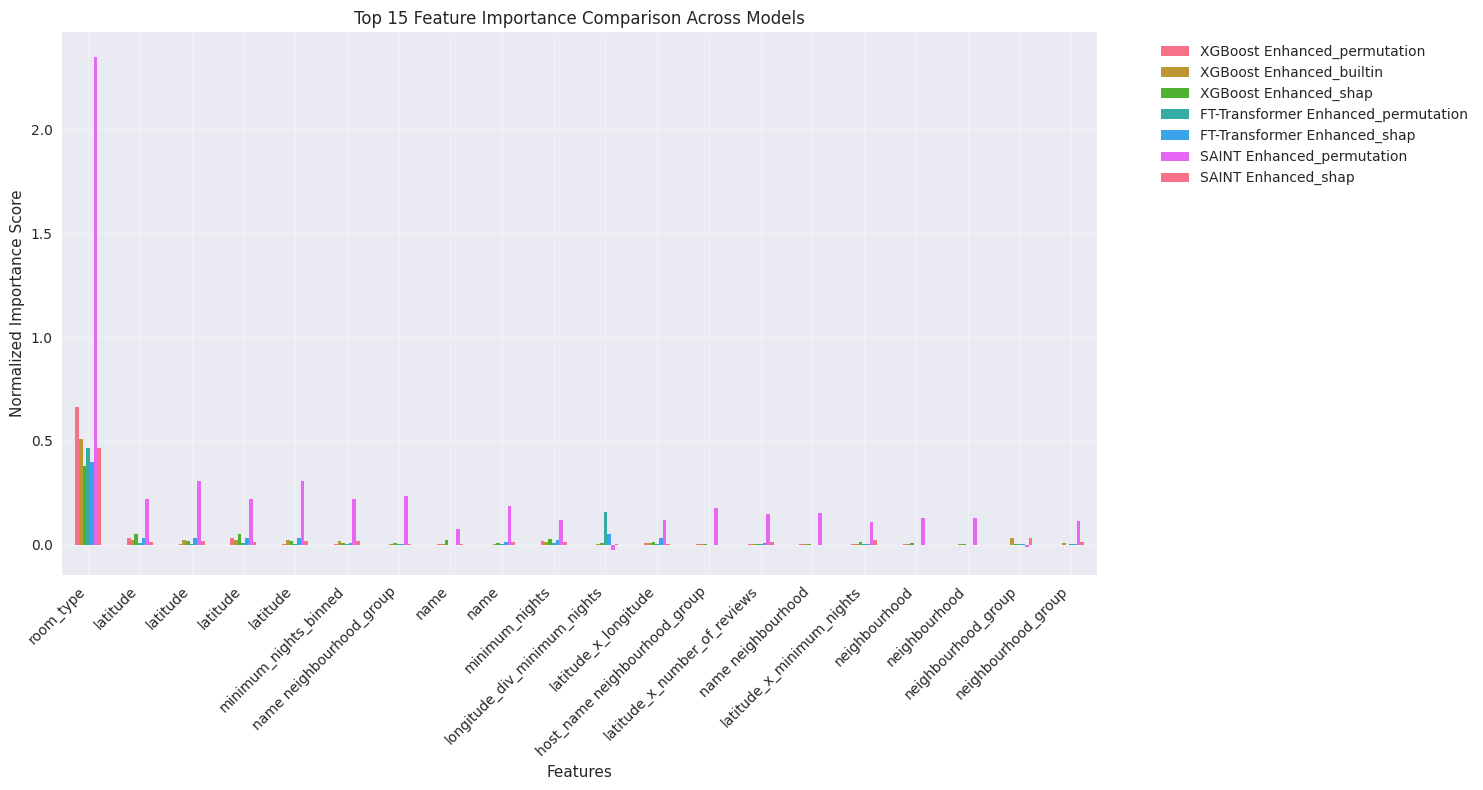

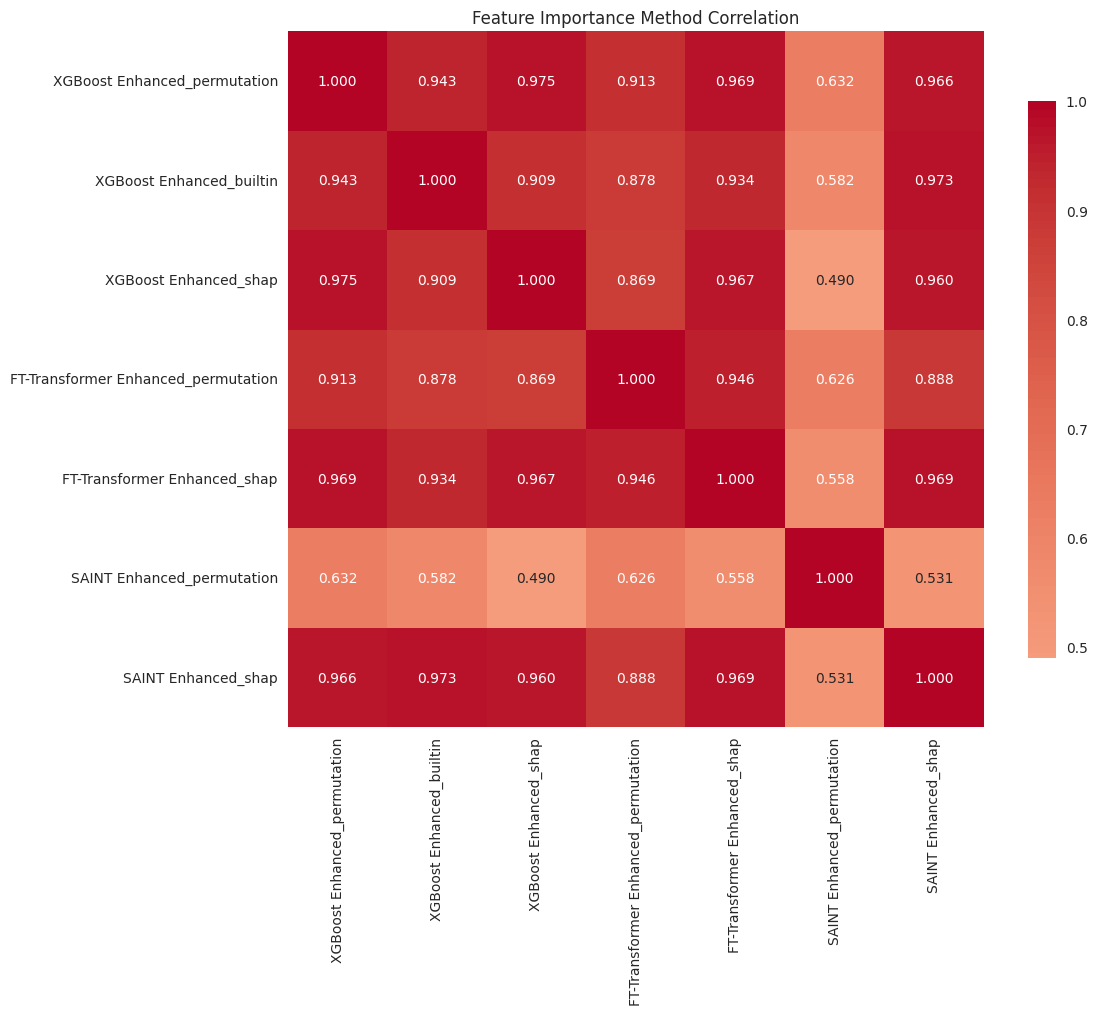

2025-08-01 09:33:13,483 - INFO - Feature importance comparison completed



📊 Feature Importance Comparison Table:
                                      XGBoost Enhanced_permutation  XGBoost Enhanced_builtin  XGBoost Enhanced_shap  FT-Transformer Enhanced_permutation  FT-Transformer Enhanced_shap  SAINT Enhanced_permutation  SAINT Enhanced_shap
name                                                        0.0017                    0.0041                 0.0222                              -0.0001                        0.0000                      0.0747               0.0010
host_name                                                   0.0014                    0.0030                 0.0043                              -0.0007                        0.0000                      0.0572               0.0000
neighbourhood_group                                         0.0003                    0.0322                 0.0030                               0.0016                        0.0009                     -0.0097               0.0338
neighbourhood                   

In [17]:
# Compare feature importance across models
importance_comparison, avg_importance = perform_cross_model_comparison(explainer)

if importance_comparison is not None:
    print("\n📊 Feature importance comparison completed successfully!")
    print(f"Top 3 features: {list(avg_importance.head(3).index)}")
else:
    print("⚠️ No feature importance data available for comparison")

### 4.6 Generate Detailed Reports

In [18]:
# Generate detailed explanation reports for each model
generate_explanation_reports(explainer)


DETAILED EXPLANATION REPORTS
Available models for reporting: ['XGBoost Enhanced', 'FT-Transformer Enhanced', 'SAINT Enhanced']

EXPLANATION REPORT: XGBoost Enhanced

📋 EXPLANATION REPORT: XGBoost Enhanced

📊 Baseline Performance:
   R² Score: 0.5939
   RMSE: 0.3750
   MAE: 0.2630
   MAPE: 0.06%
   Training Time: 0.000s
   Inference Time: 0.123s

🎯 Top 10 Most Important Features (Permutation):
    1. room_type: 0.6331
    2. longitude: 0.1188
    3. availability_365: 0.0540
    4. latitude: 0.0291
    5. minimum_nights: 0.0170
    6. longitude_binned: 0.0151
    7. calculated_host_listings_count: 0.0121
    8. latitude_div_longitude: 0.0096
    9. reviews_per_month: 0.0086
   10. latitude_x_longitude: 0.0067

🏗️ Top 10 Most Important Features (Built-in):
    1. room_type: 0.5104
    2. longitude_binned: 0.1687
    3. longitude: 0.0364
    4. neighbourhood_group: 0.0322
    5. latitude_binned: 0.0222
    6. latitude: 0.0209
    7. latitude: 0.0209
    8. minimum_nights_binned: 0.0155
  

### 4.7 Business Insights

In [19]:
# Generate business insights
available_models = list(explainer.explanations.keys())
generate_business_insights(importance_comparison, avg_importance, available_models)


BUSINESS INSIGHTS FOR AIRBNB PRICE PREDICTION

💼 KEY BUSINESS INSIGHTS:

Top 5 Most Critical Features for Airbnb Price Prediction:
   1. room_type: 0.7477
      💡 Business Impact: Property and room type significantly influence pricing structure
   2. latitude: 0.0569
      💡 Business Impact: Location coordinates directly impact pricing through neighborhood desirability
   3. latitude: 0.0529
      💡 Business Impact: Location coordinates directly impact pricing through neighborhood desirability
   4. minimum_nights_binned: 0.0394
      💡 Business Impact: Minimum stay requirements affect booking flexibility and pricing strategy
   5. name neighbourhood_group: 0.0353
      💡 Business Impact: Neighborhood location is a primary driver of Airbnb pricing

🔍 MODEL INTERPRETABILITY INSIGHTS:

📋 ACTIONABLE BUSINESS RECOMMENDATIONS:

🎯 For Hosts:
   • Optimize pricing based on location and property features
   • Invest in amenities that significantly impact pricing
   • Adjust prices seasonally 

### 4.8 Ablation Studies

In [6]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train_scaled.shape[1])

(29022, 43)
(9777, 43)
(29022,)
(9777,)
43


In [ ]:
# Run enhanced ablation studies
import torch, gc
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
gc.collect()
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats()
torch.cuda.reset_accumulated_memory_stats()


# Instead of passing all models
# model_names = ['XGBoost', 'FT-Transformer', 'SAINT']
print(torch.cuda.memory_summary())
ablation_analyzer, ablation_results, ablation_summary_df = run_ablation_studies(
    models_to_analyze, X_train_scaled, X_test_scaled, y_train, y_test, feature_names
)

if ablation_results:
    print("\n✅ Ablation studies completed successfully!")
    print(f"Models analyzed: {list(ablation_results.keys())}")
else:
    print("⚠️ Ablation studies encountered issues")

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   9887 KiB |   9887 KiB |      0 B   |      0 B   |
|       from large pool |   8320 KiB |   8320 KiB |      0 B   |      0 B   |
|       from small pool |   1567 KiB |   1567 KiB |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |   9887 KiB |   9887 KiB |      0 B   |      0 B   |
|       from large pool |   8320 KiB |   8320 KiB |      0 B   |

In [ ]:
#import torch, gc
#import os
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
#gc.collect()
#torch.cuda.empty_cache()
#torch.cuda.reset_peak_memory_stats()
#torch.cuda.reset_accumulated_memory_stats()


# Instead of passing all models
# model_names = ['XGBoost', 'FT-Transformer', 'SAINT']
#print(torch.cuda.memory_summary())

# Pass only SAINT
#saint_model = models_to_analyze['SAINT']
#temp = {"SAINT":saint_model}
#analyzer, results = run_ablation_studies(
#    temp, 
#    X_train_scaled, X_test_scaled, y_train, y_test, feature_names
#)


### 4.9 Generate Analysis Summary

In [ ]:
print(ablation_analyzer.results['Improved FT-Transformer']['baseline'])

In [20]:
# Generate comprehensive analysis summary
generate_analysis_summary(comparison_df, importance_comparison, avg_importance, ablation_results)


EXPLAINABILITY ANALYSIS SUMMARY

🏆 MODEL PERFORMANCE RECAP:
   R²_Score    RMSE     MAE    MAPE
0    0.5939  0.3750  0.2630  0.0597
1    0.5009  0.4157  0.2969  0.0675
2    0.5510  0.3943  0.2865  0.0662

🎯 KEY FEATURE IMPORTANCE INSIGHTS:

Most Important Features for Airbnb Price Prediction:
   1. room_type: 0.7477
   2. latitude: 0.0569
   3. latitude: 0.0529
   4. minimum_nights_binned: 0.0394
   5. name neighbourhood_group: 0.0353

Feature Importance Consensus: 43 features analyzed
Top feature: room_type (0.7477)

📋 KEY FINDINGS:

• Airbnb pricing is primarily driven by location and property characteristics
• Location coordinates and property capacity are consistently important features
• Property type and amenities significantly impact pricing decisions
• Different models may prioritize different feature combinations
• Feature importance consensus helps identify robust pricing predictors
• Model interpretability varies significantly across architectures
• XGBoost provides the bes

### 4.10 Save Final Results

In [21]:
# Save final results
results_file = save_final_results(
    explainer, importance_comparison, avg_importance, feature_names, 
    models_to_analyze, ablation_results
)

print(f"\n🎉 Analysis complete! Results saved to: {results_file}")

2025-08-01 09:35:05,097 - INFO - Comprehensive results saved to ./Section3_Explainability/comprehensive_explainability_results.pkl


💾 Section 3 explainability results saved to 'airbnb_section3_explainability.pkl'
📋 This file contains all explainability analysis results
💾 Intermediate results saved to './Section3_Explainability/comprehensive_explainability_results.pkl'

🎉 Airbnb Price Prediction Explainability Analysis Complete!

📊 Generated Files:
   - Feature importance comparison CSV
   - Feature importance correlation heatmap
   - Top features comparison visualization
   - Individual model explanation plots (SHAP, LIME, etc.)
   - Comprehensive explainability results pickle file
   - Ablation study results and visualizations
   - Analysis log file

🚀 Ready for business implementation and model deployment!

🎉 Analysis complete! Results saved to: airbnb_section3_explainability.pkl


## 5. Results Summary

Display key results and insights from the analysis:

In [22]:
# Display key results summary
if 'results' in locals() and results is not None:
    print("🎯 ANALYSIS RESULTS SUMMARY")
    print("=" * 50)
    print(f"Models Analyzed: {results['models_analyzed']}")
    print(f"Total Features: {len(results['feature_names'])}")
    
    if results['avg_importance'] is not None:
        print(f"\nTop 5 Most Important Features:")
        for i, (feature, importance) in enumerate(results['avg_importance'].head(5).items()):
            print(f"   {i+1}. {feature}: {importance:.4f}")
    
    print(f"\nResults saved to: {results['results_file']}")
    print("\n📊 Generated visualizations and reports in ./Section3_Explainability/")
    
elif 'explainer' in locals():
    print("🎯 STEP-BY-STEP ANALYSIS COMPLETED")
    print("=" * 50)
    print(f"Models Analyzed: {list(explainer.explanations.keys())}")
    print(f"Total Features: {len(feature_names)}")
    
    if 'avg_importance' in locals() and avg_importance is not None:
        print(f"\nTop 5 Most Important Features:")
        for i, (feature, importance) in enumerate(avg_importance.head(5).items()):
            print(f"   {i+1}. {feature}: {importance:.4f}")
    
    print("\n📊 Generated visualizations and reports in ./Section3_Explainability/")
    
else:
    print("⚠️ No analysis results available. Please run the analysis first.")

🎯 STEP-BY-STEP ANALYSIS COMPLETED
Models Analyzed: ['XGBoost Enhanced', 'FT-Transformer Enhanced', 'SAINT Enhanced']
Total Features: 43

Top 5 Most Important Features:
   1. room_type: 0.7477
   2. latitude: 0.0569
   3. latitude: 0.0529
   4. minimum_nights_binned: 0.0394
   5. name neighbourhood_group: 0.0353

📊 Generated visualizations and reports in ./Section3_Explainability/


## 6. Next Steps

After completing this explainability analysis, you can:

1. **Review Generated Files**: Check the `./Section3_Explainability/` directory for:
   - Feature importance comparison CSV
   - SHAP and LIME explanation plots
   - Ablation study results
   - Comprehensive analysis logs

2. **Business Implementation**: Use the business insights to:
   - Optimize Airbnb pricing strategies
   - Improve price prediction models
   - Develop location and amenity-based pricing plans

3. **Model Deployment**: Choose the best model based on:
   - Performance metrics (R², RMSE, MAE)
   - Interpretability requirements
   - Computational efficiency needs

4. **Further Analysis**: Consider:
   - Location-specific explainability
   - Seasonal pricing pattern analysis
   - Real-time price prediction monitoring